In [4]:
import numpy as np
import pyswarms as ps

c1 = 100
c2 = 100
x1_f = 0.0
x2_f = 0.0
tf = 2.0
N = 50
dt = tf/N

x0 = np.array([1.0, 1.0])

def state_equations(u):
    M, N = u.shape
    X = np.zeros((M, N, 2))
    X[:, 0, :] = x0
    for i in range(1, N):
        X[:, i, 0] = X[:, i-1, 0] + dt * X[:, i-1, 1]
        X[:, i, 1] = X[:, i-1, 1] + dt * u[:, i-1]
    return X

def cost_function(u):
    X = state_equations(u)
    x1_coeff = c1 * (X[:, -1, 0] - x1_f)**2
    x2_coeff = c2 * (X[:, -1, 1] - x2_f)**2
    integral = 0.5 * np.sum(u**2, axis=1) * dt
    return x1_coeff + x2_coeff + integral

# Define bounds for u
bounds = (-4 * np.ones(N), 3 * np.ones(N))

# Initialize the optimizer
options_local = {'c1': 0.5, 'c2': 0.5, 'w': 0.8, 'k': 3, 'p': 1}
options_global = {'c1': 0.5, 'c2': 0.5, 'w': 0.8}
optimizer = ps.single.LocalBestPSO(n_particles=20, dimensions=N, options=options_local, bounds=bounds)

# Perform optimization
best_cost, best_u = optimizer.optimize(cost_function, iters=1000)

# Print the optimal control
print("Optimal control u(t):", best_u)
    

2024-07-01 16:03:23,890 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.8, 'k': 3, 'p': 1}
pyswarms.single.local_best: 100%|██████████|1000/1000, best_cost=56.3
2024-07-01 16:03:24,436 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 56.33285478867398, best pos: [-2.81501663 -1.25283192 -1.48206236 -0.45241393 -1.38644441 -0.55901342
 -3.42264727 -3.05072165 -1.09466305 -3.51926103 -0.34310307  0.66519212
 -2.66977122 -0.51709846 -1.70814377 -3.19582818 -0.27316896 -2.06827465
 -0.85009914 -2.99424526 -2.70204644 -3.17192499 -1.53212789  1.16511548
  0.55696416 -0.3826097   0.34611178 -1.94550112 -1.06828108 -2.18198788
 -2.05371639  1.36935758 -1.71486394  0.50881802 -1.26278241 -0.84721206
  2.04816546  1.84332188 -1.48266746  1.2437928  -1.54698772 -0.86091704
  1.75540323  1.90998694 -0.81734913  0.84122618  2.97406241 -0.35897888
  1.79600124 -2.60754834]


Optimal control u(t): [-2.81501663 -1.25283192 -1.48206236 -0.45241393 -1.38644441 -0.55901342
 -3.42264727 -3.05072165 -1.09466305 -3.51926103 -0.34310307  0.66519212
 -2.66977122 -0.51709846 -1.70814377 -3.19582818 -0.27316896 -2.06827465
 -0.85009914 -2.99424526 -2.70204644 -3.17192499 -1.53212789  1.16511548
  0.55696416 -0.3826097   0.34611178 -1.94550112 -1.06828108 -2.18198788
 -2.05371639  1.36935758 -1.71486394  0.50881802 -1.26278241 -0.84721206
  2.04816546  1.84332188 -1.48266746  1.2437928  -1.54698772 -0.86091704
  1.75540323  1.90998694 -0.81734913  0.84122618  2.97406241 -0.35897888
  1.79600124 -2.60754834]


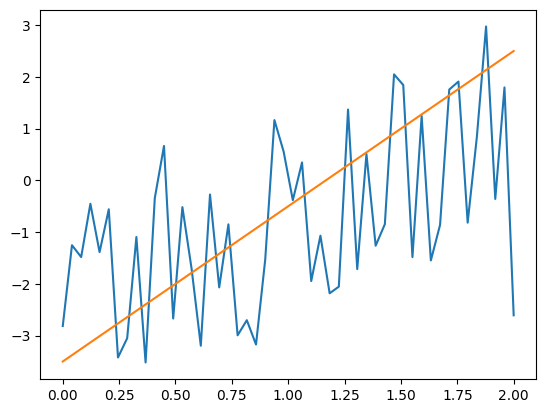

In [5]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, 2, N), best_u)
plt.plot(np.linspace(0, 2, N), 3 * np.linspace(0, 2, N) - 3.5)

In [16]:
def generate_unique_numbers(n, k, init):
    arr = [init]
    while len(arr) < k + 1:
        num = np.random.randint(0, n)
        if num not in arr:
            arr.append(num)
    return np.array(arr)

In [20]:
ind = generate_unique_numbers(20, 3, 2)
x = np.random.rand(20)

In [22]:
print(x)
print(ind)
print(x[ind])

[0.23196743 0.04100939 0.45540471 0.3083118  0.37909506 0.90015511
 0.79267617 0.62324432 0.08922046 0.84233064 0.71596973 0.84533912
 0.15210988 0.92662466 0.66781282 0.28262339 0.49973472 0.23570133
 0.93320786 0.86004339]
[ 2 10  8 19]
[0.45540471 0.71596973 0.08922046 0.86004339]


In [39]:
def state_equations(u, x0, dt):
    N, = u.shape
    X = np.zeros((N, 2))
    X[0, :] = [1, 1]
    for i in range(1, N):
        X[i, 0] = X[i-1, 0] + dt * X[i-1, 1]
        X[i, 1] = X[i-1, 1] + dt * u[i-1]
    return X

def cost_function(u, x0, dt):
    X = state_equations(u, x0, dt)
    x1_coeff = c1 * (X[-1, 0] - 0)**2
    x2_coeff = c2 * (X[-1, 1] - 0)**2
    integral = 0.5 * np.sum(u**2) * dt
    return x1_coeff + x2_coeff + integral

In [51]:

def LocalBestSwarm(N, n, MINNF, vmax, C1min, C1max, C2min, C2max, C3min, C3max, Wmin, Wmax, Xmin, Xmax, Vmax, T, delta_s_max, cost_function, x0, dt):
    X = np.zeros((N, n))
    P_best = np.zeros((N, n))
    BEST = np.zeros(N)
    fitness = np.zeros(N)
    V = np.zeros((N, n))
    for i in range(N):
        for d in range(n):
            X[i, d] = Xmin + np.random.rand() * (Xmax - Xmin)
            V[i, d] = -Vmax + np.random.rand() * (2 * Vmax)
        P_best[i] = X[i]
        fitness[i] = cost_function(X[i], x0, 2.0/n)
        BEST[i] = fitness[i]
    i_0 = np.argmin(fitness)
    G_best = np.min(fitness)
    P_gbest = X[i_0]
    found = False
    s = 1
    NF = np.zeros(N)
    while (s <= T and not found):

        C_1 = C1min + (C1max - C1min) * (T - s) / T
        C_2 = C2min + (C2max - C2min) * (T - s) / T
        C_3 = C3min + (C3max - C3min) * (T - s) / T
        W = Wmax - (Wmax - Wmin) * (T - s) / T
        for i in range(N):

            social_neighbourhood = generate_unique_numbers(N, 3, i)
            P_lbest = P_best[social_neighbourhood[np.argmin(fitness[social_neighbourhood])]]

            for d in range(n):
                R1 = np.random.rand()
                R2 = np.random.rand()
                R3 = np.random.rand()
                V[i, d] = W * V[i, d] + C_1 * R1 * (P_best[i, d] - X[i, d]) + C_2 * R2 * (P_lbest[d] - X[i, d]) + C_3 * R3 * (P_gbest[d] - X[i, d])

                # velocity control
                if V[i, d] > vmax:
                    V[i, d] = vmax
                if V[i, d] < -vmax:
                    V[i, d] = -vmax
                X[i, d] = X[i, d] + V[i, d]

                # position control
                if X[i, d] > Xmax:
                    tau = X[i, d] - Xmax
                    X[i, d] = Xmax - tau
                    V[i, d] = -(V[i, d] - tau)
                if X[i, d] < Xmin:
                    tau = Xmin - X[i, d]
                    X[i, d] = Xmax + tau
                    V[i, d] = -(V[i, d] - tau)
                
            # step control
            for d in range(n - 1):
                delta_gt_mx = X[:, d] - X[:, d+1] > delta_s_max
                X[delta_gt_mx, d+1] = X[delta_gt_mx, d] + delta_s_max
                delta_lt_mn = X[:, d] - X[:, d+1] < -delta_s_max
                X[delta_lt_mn, d+1] = X[delta_lt_mn, d] - delta_s_max
            
            fitness[i] = cost_function(X[i], x0, 2.0/n)

            if fitness[i] < BEST[i]:
                P_best[i] = X[i]
                BEST[i] = fitness[i]
            else:
                NF[i] = NF[i] + 1
            
            if fitness[i] < G_best:
                G_best = fitness[i]
                P_gbest = X[i]
            
        if np.all(NF >= MINNF):
            found = True
        
        s = s + 1

    return G_best, P_gbest

                    
                


In [59]:
best, best_u = LocalBestSwarm(N=20, n=20, MINNF=100, vmax=5, C1min=0.5, C1max=2, C2min=1, C2max=1.5, C3min=0.5, C3max=1.5, Wmin=0.2, Wmax=0.5, Xmin=-4, Xmax=3, Vmax=5, T=1000, delta_s_max=3, cost_function=cost_function, x0=x0, dt=dt)

In [60]:
print(best_u)

[  2.55055789   1.27619353  -0.92862827  -3.92862827  -6.92862827
  -9.92862827 -12.92862827 -15.92862827 -18.92862827 -21.92862827
 -24.92862827 -27.92862827 -30.92862827 -27.92862827 -24.92862827
 -21.92862827 -18.92862827 -15.92862827 -12.92862827  -9.92862827]


[[  1.           1.        ]
 [  1.1          1.25505579]
 [  1.22550558   1.38267514]
 [  1.36377309   1.28981232]
 [  1.49275432   0.89694949]
 [  1.58244927   0.20408666]
 [  1.60285794  -0.78877616]
 [  1.52398032  -2.08163899]
 [  1.31581642  -3.67450182]
 [  0.94836624  -5.56736464]
 [  0.39162978  -7.76022747]
 [ -0.38439297 -10.2530903 ]
 [ -1.409702   -13.04595312]
 [ -2.71429731 -16.13881595]
 [ -4.32817891 -18.93167878]
 [ -6.22134678 -21.4245416 ]
 [ -8.36380094 -23.61740443]
 [-10.72554139 -25.51026726]
 [-13.27656811 -27.10313008]
 [-15.98688112 -28.39599291]]
110.07055888048238


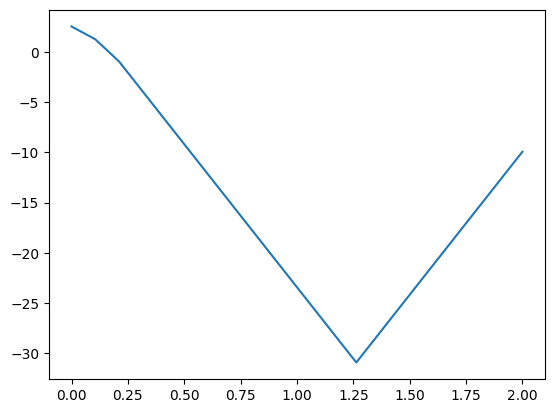

In [63]:

plt.plot(np.linspace(0, 2, 20), best_u)
print(state_equations(best_u, x0, 2.0/20))
print(best)